## Exercise 02 : Bar ##

## Imports ##

In [7]:
import pandas as pd
import sqlite3

## Task #
Сделайте всё, что нужно, чтобы создать график, похожий на Readme.

* анализировать только пользователей, а не администраторов
* размер шрифта и размер фигуры остаются такими же
* ночь — с 00:00:00 до 03:59:59, утро — с 04:00:00 до 09:59:59, день — с 10:00:00 до 16:59:59, вечер — с 17:00:00 до 23:59:59
* выберите палитру, которая вам очень нравится, не обязательно повторять её из графика
* в конце вашего Jupyter Notebook создайте markdown-клетку и вставьте вопросы:
  * Когда наши пользователи обычно делают коммиты: ночью, утром, днём или вечером?”, ответ — два самых популярных времени.
  * Какой день:
    * имеет больше всего коммитов
    * и при этом число коммитов вечером выше, чем днем?

Ответ — дата этого дня.

In [8]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [9]:
def get_daytime(time):
    if time >= pd.to_datetime('00:00:00').time() and time < pd.to_datetime('04:00:00').time():
        return 'night'
    elif time >= pd.to_datetime('04:00:00').time() and time < pd.to_datetime('10:00:00').time():
        return 'morning'
    elif time >= pd.to_datetime('10:00:00').time() and time < pd.to_datetime('17:00:00').time():
        return 'day'
    else:
        return 'evening'

In [10]:
df = pd.read_sql('SELECT * FROM checker WHERE uid LIKE "user%";', conn)
df['time'] = df['timestamp'].apply(lambda x: pd.to_datetime(x).time())
df['date'] = df['timestamp'].apply(lambda x: pd.to_datetime(x).date())
df['daytime'] = pd.Series()
df['daytime'] = df['time'].apply(lambda x: get_daytime(x))
# df.head()
df['daytime'] = df['daytime'].astype('category')
commits_by_daytime = df.groupby(['date', 'daytime']).size().reset_index()
commits_by_daytime.columns = ['date', 'daytime', 'counts']
commits_by_daytime.head()

C:\Users\vtsab\AppData\Local\Temp\ipykernel_48148\2758162867.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  commits_by_daytime = df.groupby(['date', 'daytime']).size().reset_index()


,date,daytime,counts
0,2020-04-17,day,10
1,2020-04-17,evening,0
2,2020-04-17,morning,13
3,2020-04-17,night,0
4,2020-04-18,day,33


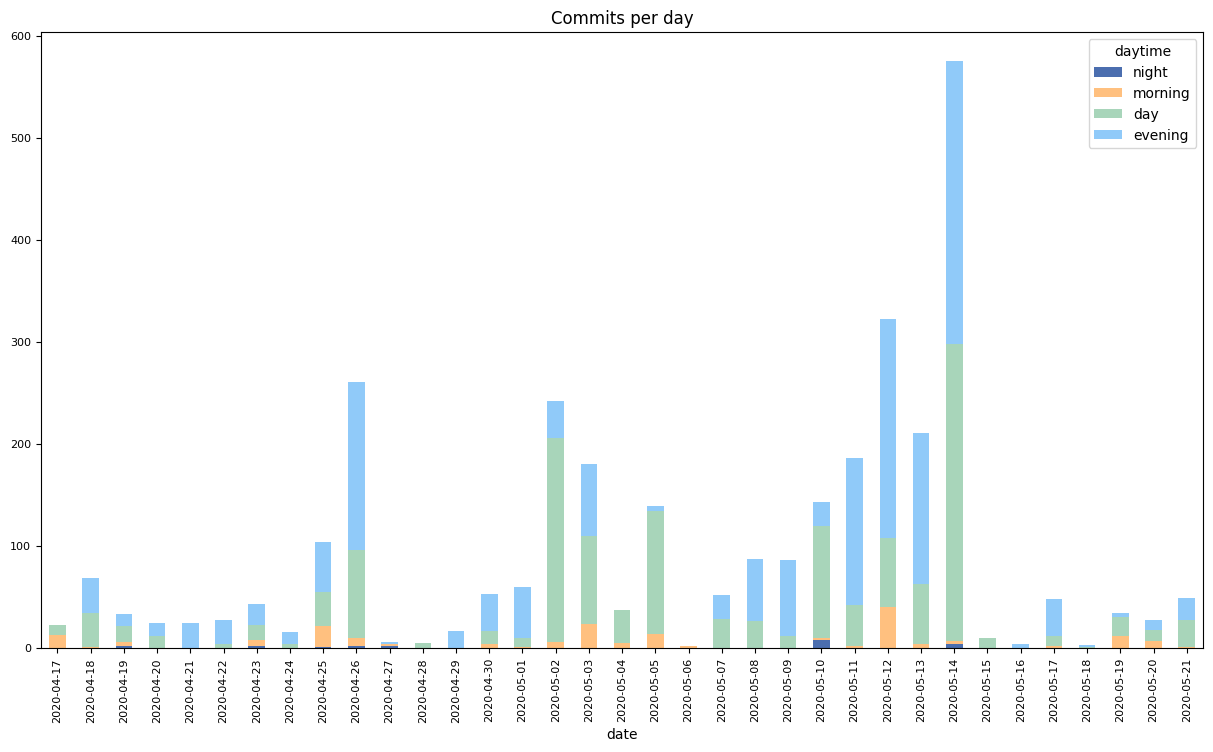

In [11]:
pivot_df = commits_by_daytime.pivot_table(index='date', columns='daytime', values='counts', fill_value=0, observed=False)
pivot_df = pivot_df[['night', 'morning', 'day', 'evening']]
ax = pivot_df.plot(kind='bar', title='Commits per day', stacked=True, figsize=(15,8), fontsize=8, rot=90, color=['#4B6EAF', '#FFC07F', '#A8D5BA', '#90CAF9'])

In [12]:
pivot_df

daytime,night,morning,day,evening
date,,,,
2020-04-17,0.0,13.0,10.0,0.0
2020-04-18,0.0,1.0,33.0,35.0
2020-04-19,2.0,4.0,16.0,11.0
2020-04-20,0.0,0.0,12.0,13.0
2020-04-21,0.0,0.0,0.0,25.0
2020-04-22,0.0,0.0,4.0,24.0
2020-04-23,2.0,6.0,15.0,20.0
2020-04-24,0.0,0.0,4.0,12.0
2020-04-25,1.0,21.0,33.0,49.0


In [13]:
conn.close()

Когда наши пользователи обычно делают коммиты: ночью, утром, днём или вечером? Ответ — два самых популярных времени.

Ответ: Наши пользователи - адекватные люди. Они коммитят в основном днем и вечером.

Какой день:
+ имеет больше всего коммитов
+ и при этом число коммитов вечером выше, чем днем?

Ответ: Вообще больше всего коммитов 2020-05-14, но там количество коммитов днем больше, чем вечером.
Так что ответ - 2020-05-12.